# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1) Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231BD723CC0>]], dtype=object)

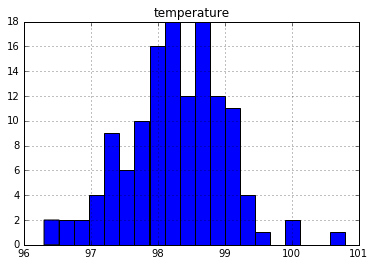

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist('temperature', bins = 0)

There are 130 entries in the data. From the histogram above, the distribution of the body temperature is roughly normal.

### 2) Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

The sample size is large (n > 30). The observations are independent.

### 3) Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the t or z statistic?
- Now try using the other test. How is the result be different? Why?

I will use one-sample test because there is no groups for comparison which is required for two-sample test.

It is appropriate to use t statistic because the variance for the population is unknown. 

### 4) At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

In [14]:
df.temperature.mean()

98.24923076923078

In [15]:
df.temperature.std()

0.7331831580389454

At a significance level of alpha = 0.05, t_critical = 1.96.

margin of error = t_critical * SE = 1.96 * 0.733 = 1.437

Confidence interval = (mean - margin of error, mean + margin of error) = (98.249 - 1.437, 98.249 + 1.437) = (96.812, 99.686)

Temperature < 96.812 or > 99.686 is considered to be abnormal.

### 5) Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

I will use two sample t-test because I am comparing the difference between males' temperature and females' temperature statistically.

In [19]:
df[df.gender == 'F'].temperature.mean()

98.39384615384613

In [20]:
df[df.gender == 'F'].temperature.std()

0.7434877527313665

In [23]:
len(df[df.gender == 'F'].temperature)

65

In [21]:
df[df.gender == 'M'].temperature.mean()

98.1046153846154

In [22]:
df[df.gender == 'M'].temperature.std()

0.6987557623265908

In [24]:
len(df[df.gender == 'M'].temperature)

65

- H_null: Tf = Tm
- H_alternative: Tf != Tm
    
Here Tf represents normal temperature of females and Tm represents normal temperature of males.

SE  = sqrt(SE_f^2/nf + SE_m^2/nm) = sqrt(0.743*2/65 + 0.699*2/65) = 0.211

t_statistic = (mean_f - mean_m)/SE = (98.394 - 98.105)/0.211 = 1.370

For two tail test and at a significance level of alpha = 0.05, degree of freedom = 65+65-1 = 129, t_critical = 1.980

t_statistic < t_critical

p = 0.173 > alpha

So there is not enough evidence to reject the null hypothesis.


#### The mean normal body temperature was held to be 37∘C or 98.6∘F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. This value is statistically correct. The normal temperature of male and that of female is not statistically significant.